In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
def read_result(method,n,m,d,seed):
    dic = None
    with open("_%s/n%d_s%d_c%d_r%d/output.txt"%(method,n,m,d,seed),"r") as fin:
        for line in fin:
            dic = eval(line)
    if "F" in dic:
        return dic["obj"],dic["time"],np.array(dic["F"])
    else :
        return dic["objective"],dic["runtime"],np.array(dic["frequency_matrix"])

In [9]:
def read_freq(n,m,d,seed):
    return np.loadtxt("simulations/n%d_s%d_c%d_r%d/sim_frequency_matrix.txt"%(n,m,d,seed))

In [13]:
# read_result("fastppm",100,3,100,1)
# read_freq(100,3,100,1)

In [16]:
cols = ["method","n","m","d","seed","diff","obj","time"]

In [34]:
data = {_:[] for _ in cols}
for method in ["fastppm","ppm100","ppm1000","ppm10000","LP100","LP1000","cvxopt"]:
    for n in [100,500,1000,2500]:
        for m in [3]:
            for d in [30,100,1000]:
                for seed in range(1,21):
                    obj,time,F = read_result(method,n,m,d,seed)
                    real_F = read_freq(n,m,d,seed)
                    diff = np.abs(F-real_F).max()
                    for key in data:
                        data[key].append( eval(key))

In [35]:
df = pd.DataFrame(data)

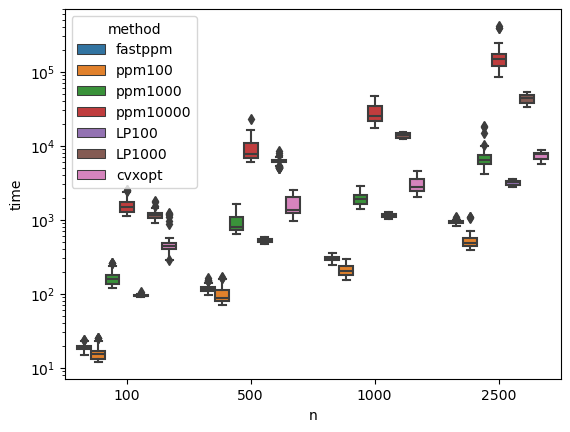

In [36]:
sns.boxplot(df,x = "n", y = "time", hue = "method")
plt.yscale("log")

<Axes: xlabel='n', ylabel='diff'>

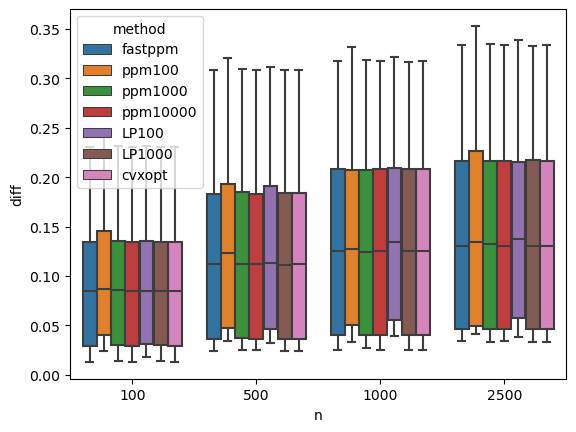

In [37]:
sns.boxplot(df,x = "n", y = "diff", hue = "method")

<Axes: xlabel='n', ylabel='obj'>

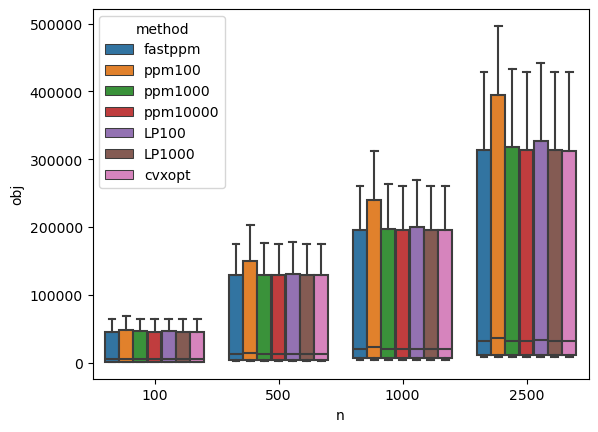

In [38]:
sns.boxplot(df,x = "n", y = "obj", hue = "method")